In [1]:
import pandas as pd
df3 = pd.read_csv('/content/NYPD_Arrests_Data__Historic__20231220.csv')

In [2]:
df3.shape

(1053302, 19)

In [21]:
df3.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
5,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
6,237291769,12/03/2021,579.0,NaN,NaN,NaN,PL 2224001,F,Q,115,0.0,25-44,M,BLACK,1018534.0,220579.0,40.772056,-73.876224,POINT (-73.87622400099998 40.77205649600006)
7,236106641,11/10/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,41,72.0,25-44,M,WHITE HISPANIC,1017934.0,232221.0,40.804013,-73.878332,POINT (-73.87833183299993 40.804012949000025)
8,238383628,12/28/2021,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,Q,113,0.0,18-24,M,BLACK,1045482.0,191341.0,40.691660,-73.779199,POINT (-73.77919852099996 40.69166001700007)
9,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)


In [5]:
dft = df3[['ARREST_PRECINCT','PD_DESC','PERP_RACE']]

In [8]:
dft['PD_DESC'].unique()

array([nan, 'RAPE 3', 'CHILD, ENDANGERING WELFARE',
       'CONTROLLED SUBSTANCE, POSSESSION 7', 'SEXUAL ABUSE',
       'ARSON 2,3,4', 'FORGERY,ETC.,UNCLASSIFIED-FELO', 'ASSAULT 3',
       'STRANGULATION 1ST', 'RAPE 1', 'TRESPASS 3, CRIMINAL',
       'FACILITATION 4, CRIMINAL', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'SEXUAL ABUSE 3,2', 'PROSTITUTION', 'SEXUAL ABUSE 1', 'SODOMY 1',
       'WEAPONS POSSESSION 3', 'RIOT 1', 'MARIJUANA, POSSESSION 1, 2 & 3',
       'SODOMY 2', 'MARIJUANA, SALE 4 & 5', 'RAPE 2',
       'IMPERSONATION 2, PUBLIC SERVANT',
       'CONTROLLED SUBSTANCE,INTENT TO', 'ASSAULT 2,1,UNCLASSIFIED',
       'SODOMY 3', 'STOLEN PROPERTY 3,POSSESSION',
       'RECKLESS ENDANGERMENT 1', 'FORGERY,ETC.,UNCLASSIFIED-FELONY',
       'LARCENY,PETIT FROM OPEN AREAS,', 'MARIJUANA, POSSESSION 4 & 5',
       'BURGLARY,RESIDENCE,NIGHT', 'WEAPONS POSSESSION 1 & 2',
       'TRESPASS 2, CRIMINAL', 'ROBBERY,UNCLASSIFIED,OPEN AREAS',
       'FORGERY,ETC.-MISD.', 'WEAPONS, POSSESSION, E

In [9]:
dft['PERP_RACE'].unique()

array(['BLACK', 'WHITE HISPANIC', 'UNKNOWN', 'WHITE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER'], dtype=object)

In [10]:
dft['PERP_RACE']= dft['PERP_RACE'].apply(str)

<ipython-input-10-0a55d343f5f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['PERP_RACE']= dft['PERP_RACE'].apply(str)


In [11]:
dft = dft.loc[dft["PERP_RACE"] !=  "NanN" ]
dft = dft.loc[dft["PERP_RACE"] !=  "UNKNOWN" ]
dft = dft.replace('WHITE HISPANIC','HISPANIC').replace('BLACK HISPANIC','HISPANIC').replace('AMERICAN INDIAN/ALASKAN NATIVE',"OTHER")

dft = dft.replace('ASIAN / PACIFIC ISLANDER',"OTHER")
dft.shape

(1046369, 3)

In [12]:
dft.head(10)

,ARREST_PRECINCT,PD_DESC,PERP_RACE
0,28,NaN,BLACK
1,41,RAPE 3,HISPANIC
2,113,"CHILD, ENDANGERING WELFARE",BLACK
3,27,"CONTROLLED SUBSTANCE, POSSESSION 7",BLACK
4,25,SEXUAL ABUSE,BLACK
6,115,NaN,BLACK
7,41,"ARSON 2,3,4",HISPANIC
8,113,"FORGERY,ETC.,UNCLASSIFIED-FELO",BLACK
9,67,RAPE 3,BLACK
10,83,ASSAULT 3,BLACK


In [13]:
dft.dtypes

ARREST_PRECINCT     int64
PD_DESC            object
PERP_RACE          object
dtype: object

In [14]:
dft['PD_DESC']= dft['PD_DESC'].apply(str)
dft['ARREST_PRECINCT']= dft['ARREST_PRECINCT'].apply(str)


In [15]:
dft = (dft[dft['PD_DESC'].str.contains('CONTROLLED SUBSTANCE')])

In [16]:
dft.head(10)

,ARREST_PRECINCT,PD_DESC,PERP_RACE
3,27,"CONTROLLED SUBSTANCE, POSSESSION 7",BLACK
59,32,"CONTROLLED SUBSTANCE,INTENT TO",BLACK
71,71,"CONTROLLED SUBSTANCE, POSSESSION 7",BLACK
194,44,"CONTROLLED SUBSTANCE, POSSESSION 7",BLACK
264,23,"CONTROLLED SUBSTANCE, POSSESSION 7",HISPANIC
331,7,"CONTROLLED SUBSTANCE,SALE 3",BLACK
416,30,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",HISPANIC
576,14,"CONTROLLED SUBSTANCE,SALE 3",BLACK
580,45,"CONTROLLED SUBSTANCE,SALE 3",HISPANIC
657,78,"CONTROLLED SUBSTANCE, POSSESSI",BLACK


In [17]:
import numpy as np
dft['Precinct'] = np.where(dft['ARREST_PRECINCT'] == "50", 'My Precinct', 'Rest_of_NYC')
dfg = dft.groupby(['Precinct']).count()
print(dfg)


             ARREST_PRECINCT  PD_DESC  PERP_RACE
Precinct                                        
My Precinct              380      380        380
Rest_of_NYC            95547    95547      95547


In [18]:
dft['PD_DESC'].unique()

array(['CONTROLLED SUBSTANCE, POSSESSION 7',
       'CONTROLLED SUBSTANCE,INTENT TO', 'CONTROLLED SUBSTANCE,SALE 3',
       'CONTROLLED SUBSTANCE,INTENT TO SELL 3',
       'CONTROLLED SUBSTANCE, POSSESSI', 'CONTROLLED SUBSTANCE, INTENT T',
       'CONTROLLED SUBSTANCE,POSSESS.', 'CONTROLLED SUBSTANCE,SALE 1',
       'CONTROLLED SUBSTANCE, SALE 5', 'CONTROLLED SUBSTANCE,SALE 2',
       'CONTROLLED SUBSTANCE, SALE 4', 'CONTROLLED SUBSTANCE,POSSESS. 3',
       'CONTROLLED SUBSTANCE, POSSESSION 5',
       'CONTROLLED SUBSTANCE, INTENT TO SELL 5',
       'CONTROLLED SUBSTANCE, POSSESSION 4',
       'CONTROLLED SUBSTANCE,POSSESS. 2',
       'CONTROLLED SUBSTANCE,POSSESS. 1',
       'CONTROLLED SUBSTANCE,POSSESS. OF PROCURSERS'], dtype=object)

In [19]:
dft['SALE']= dft['PD_DESC'].str.contains('INTENT|SALE')



In [20]:
dft.tail(10)

,ARREST_PRECINCT,PD_DESC,PERP_RACE,Precinct,SALE
1053194,7,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",HISPANIC,Rest_of_NYC,True
1053208,52,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",HISPANIC,Rest_of_NYC,True
1053209,32,"CONTROLLED SUBSTANCE, POSSESSION 5",HISPANIC,Rest_of_NYC,False
1053227,32,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",BLACK,Rest_of_NYC,True
1053240,115,"CONTROLLED SUBSTANCE, POSSESSION 7",HISPANIC,Rest_of_NYC,False
1053250,122,"CONTROLLED SUBSTANCE, POSSESSION 7",WHITE,Rest_of_NYC,False
1053255,109,"CONTROLLED SUBSTANCE, POSSESSION 7",OTHER,Rest_of_NYC,False
1053264,77,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",BLACK,Rest_of_NYC,True
1053283,62,"CONTROLLED SUBSTANCE, POSSESSION 7",OTHER,Rest_of_NYC,False
1053293,46,"CONTROLLED SUBSTANCE, POSSESSION 7",HISPANIC,Rest_of_NYC,False


In [ ]:
dfg = dft.groupby(['Precinct']).count()
print(dfg)

             ARREST_PRECINCT  PD_DESC  PERP_RACE    SALE
Precinct                                                
My Precinct             2769     2769       2769    2769
Rest_of_NYC           572348   572348     572348  572348


In [ ]:
dfl= dft.groupby(['Precinct','ARREST_PRECINCT','SALE'], as_index= False).count()
print(dfl)

        Precinct ARREST_PRECINCT   SALE  PD_DESC  PERP_RACE
0    My Precinct              50  False     1643       1643
1    My Precinct              50   True     1111       1111
2    Rest_of_NYC               1  False      520        520
3    Rest_of_NYC               1   True      245        245
4    Rest_of_NYC              10  False     2979       2979
..           ...             ...    ...      ...        ...
150  Rest_of_NYC               9   True     3690       3690
151  Rest_of_NYC              90  False     4383       4383
152  Rest_of_NYC              90   True     3351       3351
153  Rest_of_NYC              94  False     1255       1255
154  Rest_of_NYC              94   True      938        938

[155 rows x 5 columns]


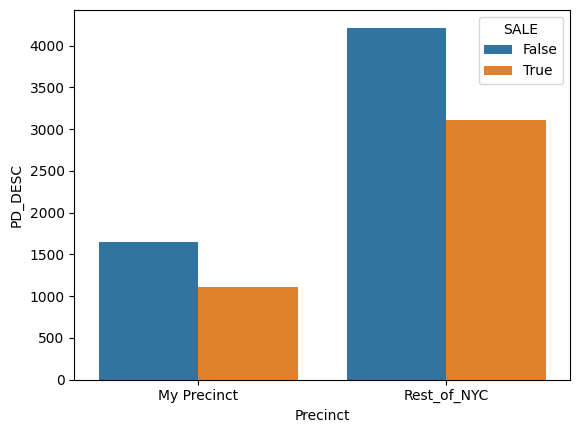

In [ ]:

import seaborn as sns
ax = sns.barplot(x = 'Precinct', y = 'PD_DESC',data = dfl,hue="SALE", errorbar=None)


In [ ]:
dfr = dft.groupby(['Precinct','ARREST_PRECINCT','PERP_RACE'], as_index= False).count()
drr.groupby.mean()

        Precinct ARREST_PRECINCT PERP_RACE  PD_DESC  SALE
0    My Precinct              50     BLACK      707   707
1    My Precinct              50  HISPANIC     1603  1603
2    My Precinct              50     WHITE      444   444
3    Rest_of_NYC               1     BLACK      289   289
4    Rest_of_NYC               1  HISPANIC      206   206
..           ...             ...       ...      ...   ...
227  Rest_of_NYC              90  HISPANIC     4997  4997
228  Rest_of_NYC              90     WHITE     1078  1078
229  Rest_of_NYC              94     BLACK      434   434
230  Rest_of_NYC              94  HISPANIC      823   823
231  Rest_of_NYC              94     WHITE      936   936

[232 rows x 5 columns]


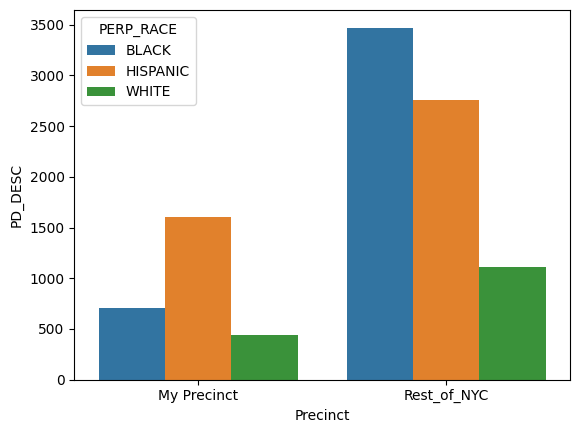

In [ ]:
import seaborn as sns
ax = sns.barplot(x = 'Precinct', y = 'PD_DESC',data = dfr,hue="PERP_RACE", errorbar=None)